# Subway Enterance EDA
---

In [1]:
import geopandas as gpd
import plotly.express as px
import numpy as np
import pyproj

import warnings
warnings.filterwarnings('ignore')

## Load Data
---

In [2]:
data = '/workspace/data/DOITT_SUBWAY_ENTRANCE_04JAN2017'

In [3]:
data_gpd = gpd.read_file(data)

## Initial Exploration
---

In [4]:
data_gpd.head()

,OBJECTID,NAME,URL,LINE,geometry
0,1734,Birchall Ave & Sagamore St at NW corner,http://web.mta.info/nyct/service/,2-5,POINT (1020670.669 248679.991)
1,1735,Birchall Ave & Sagamore St at NE corner,http://web.mta.info/nyct/service/,2-5,POINT (1020710.254 248665.112)
2,1736,Morris Park Ave & 180th St at NW corner,http://web.mta.info/nyct/service/,2-5,POINT (1019251.986 245782.870)
3,1737,Morris Park Ave & 180th St at NW corner,http://web.mta.info/nyct/service/,2-5,POINT (1019419.818 245866.910)
4,1738,Boston Rd & 178th St at SW corner,http://web.mta.info/nyct/service/,2-5,POINT (1017557.722 245631.832)


In [5]:
len(data_gpd)

1928

In [6]:
data_gpd.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
data_gpd.isnull().sum()

OBJECTID     0
NAME        29
URL          0
LINE         0
geometry     0
dtype: int64

In [10]:
data_gpd[data_gpd['NAME'].isnull()]

,OBJECTID,NAME,URL,LINE,geometry
98,1832,None,http://web.mta.info/nyct/service/,R-1,POINT (980604.146 195046.295)
99,1833,None,http://web.mta.info/nyct/service/,R-1,POINT (980604.146 195046.295)
100,1834,None,http://web.mta.info/nyct/service/,R-1,POINT (980535.378 195020.074)
101,1835,None,http://web.mta.info/nyct/service/,R-1,POINT (980535.378 195020.074)
149,5,None,http://web.mta.info/nyct/service/,B-Q,POINT (995289.862 149854.829)
229,85,None,http://web.mta.info/nyct/service/,J,POINT (1012033.789 185852.392)
230,86,None,http://web.mta.info/nyct/service/,J,POINT (1012123.639 185869.983)
242,98,None,http://web.mta.info/nyct/service/,J-M,POINT (1000423.060 194573.041)
434,290,None,http://web.mta.info/nyct/service/,F-Q,POINT (990711.572 149039.281)
435,291,None,http://web.mta.info/nyct/service/,F-Q,POINT (991233.201 149298.824)


In [11]:
data_gpd['NAME'].fillna('no-name', inplace=True)
data_gpd.isnull().sum()

OBJECTID    0
NAME        0
URL         0
LINE        0
geometry    0
dtype: int64

## Visualize Subway Stations
---

In [12]:
# Get the centroid of the geodata
data_gpd['x'] = data_gpd.centroid.x
data_gpd['y'] = data_gpd.centroid.y

# Convert into Degrees
inProj  = pyproj.Proj("+init=EPSG:2263",preserve_units=True)
outProj = pyproj.Proj("+init=EPSG:4326")

# Convert Coords
x_coord, y_coord = pyproj.transform(inProj,outProj,data_gpd['x'], data_gpd['y'])
data_gpd['Latitude'] = y_coord
data_gpd['Longitude'] = x_coord

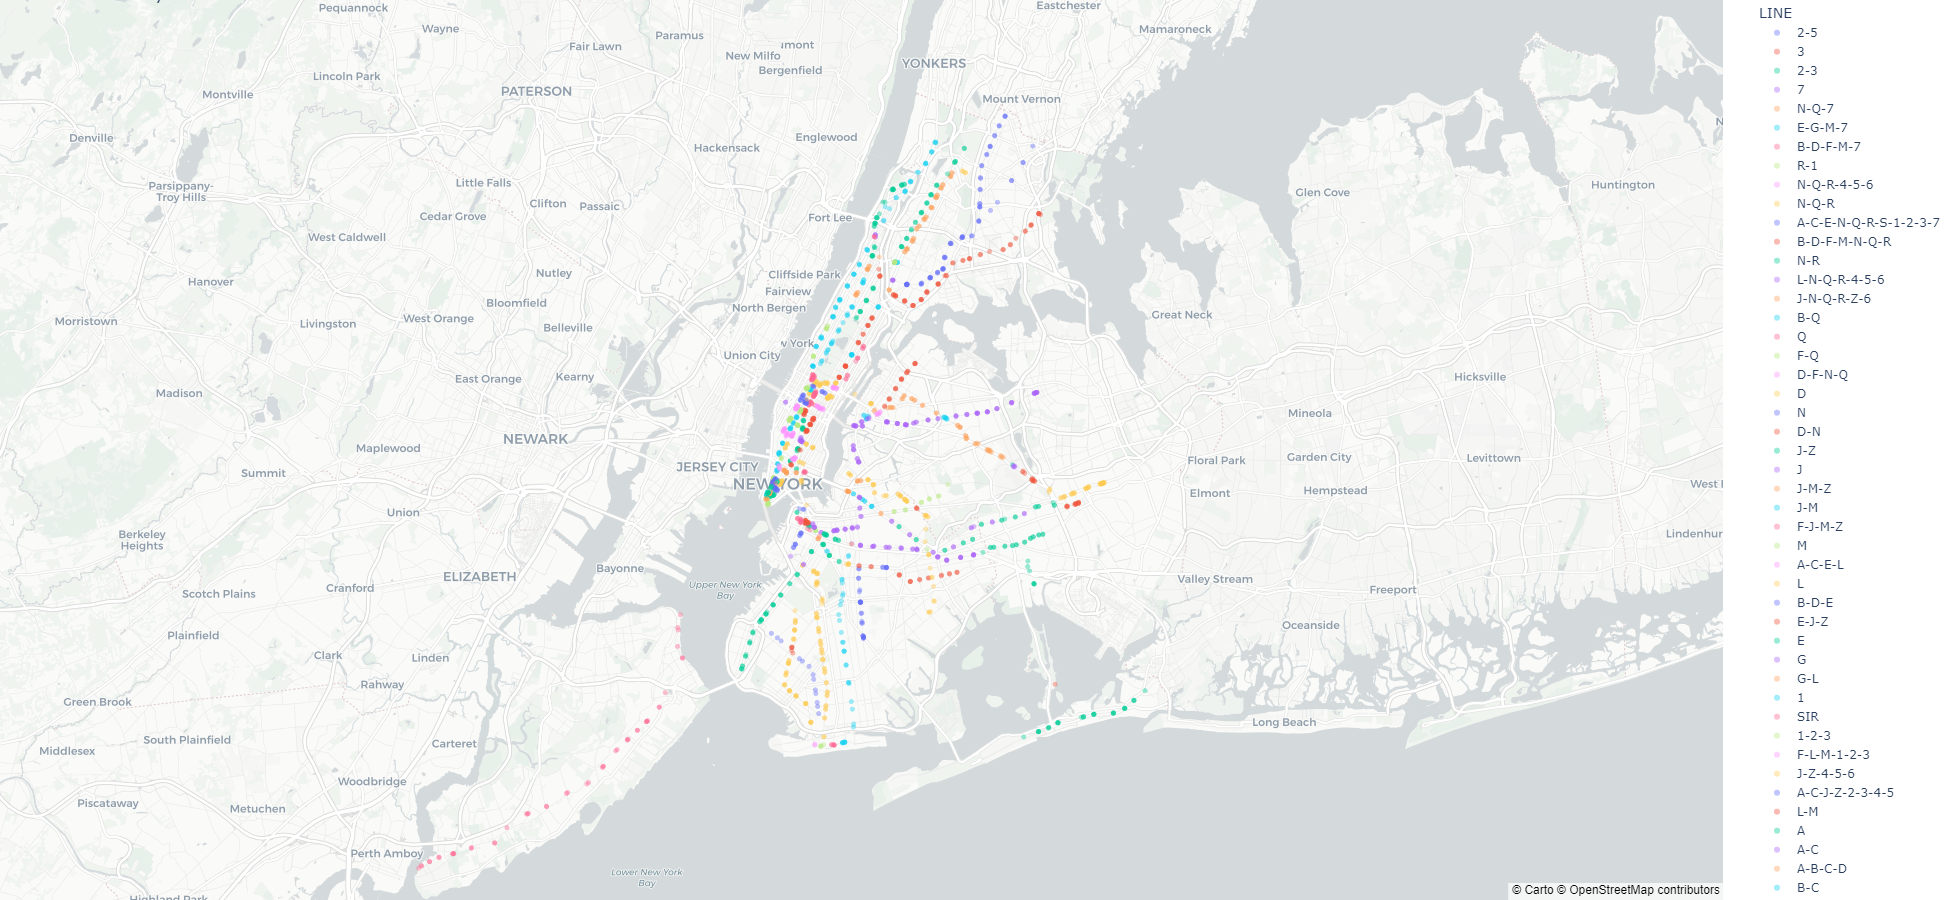

In [15]:
#Scatter Map
fig = px.scatter_mapbox(data_gpd,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="NAME",
                        hover_data=["LINE"],
                        color='LINE',
                        zoom=10,
                        height=900,
                        size_max=12,
                        opacity=0.4,
                        width=1300)
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Subway Enterance Locations in New York")
fig.show()